In [9]:
import scipy.spatial
import pysal as ps
import numpy as np
from pointpattern import PointPattern
from window import as_window
%matplotlib inline
import matplotlib.pyplot as plt
from distance_statistics import g, g_envelopes, f, f_envelopes

In [10]:
points = [[66.22, 32.54], [22.52, 22.39], [31.01, 81.21], [9.47, 31.02],
               [30.78, 60.10], [75.21, 58.93], [79.26,  7.68], [8.23, 39.93],
               [98.73, 80.53], [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]]
p1 = PointPattern(points)

In [11]:
p1

In [12]:
p1.window

In [13]:
p1.summary()

Point Pattern
12 points
Bounding rectangle [(8.23,7.68), (98.73,92.08)]
Area of window: 7638.2
Intensity estimate for window: 0.00157105077112


In [14]:
fp1 = f(p1)

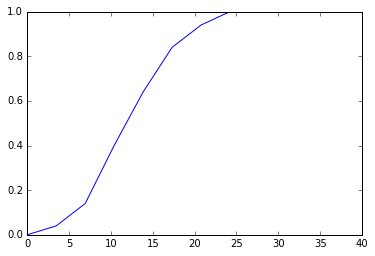

In [15]:
plt.plot(fp1[:,0], fp1[:,1])

In [16]:
sim = f_envelopes(p1, intervals=20, reps=100)

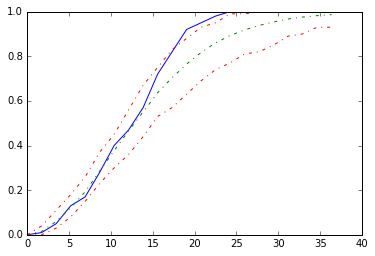

In [18]:
fs, x, fobs, mean, low, high = sim
plt.plot(x, fobs)
plt.plot(x, mean, 'g-.')
plt.plot(x, low, 'r-.')
plt.plot(x, high, 'r-.')

In [ ]:
g(p1, intervals=20)

In [ ]:
sim = g_envelopes(p1, intervals=20, reps=100)

In [ ]:
gs, x, gobs, mean, low, high = sim

In [ ]:
gs, x, gobs, mean, low, high = sim
plt.plot(x, gobs)
plt.plot(x, mean, 'g-.')
plt.plot(x, low, 'r-.')
plt.plot(x, high, 'r-.')

In [ ]:
p1.nnd

In [ ]:
from pysal.contrib import shapely_ext
va = ps.open(ps.examples.get_path("virginia.shp"))
polys = [shp for shp in va]
vapnts = ps.open(ps.examples.get_path("vapoints.shp"))
points = [shp for shp in vapnts]
state = shapely_ext.cascaded_union(polys)

In [ ]:
vpp = PointPattern(vapnts)

In [ ]:
gvpp = g(vpp)

In [ ]:
gvpp

In [ ]:
gevpp = g_envelopes(vpp)

In [ ]:
gs, x, gobs, mean, low, high = gevpp
plt.plot(x, gobs)
plt.plot(x, mean, 'g-.')
plt.plot(x, low, 'r-.')
plt.plot(x, high, 'r-.')

In [ ]:
vppw = PointPattern(vapnts, window = as_window(state))

In [ ]:
gevppw = g_envelopes(vppw)

In [ ]:
gs, x, gobs, mean, low, high = gevppw
plt.plot(x, gobs)
plt.plot(x, mean, 'g-.')
plt.plot(x, low, 'r-.')
plt.plot(x, high, 'r-.')